## Advertising Revenue Prediction with Linear Regression

In [1]:
# importing reqd libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score, mean_squared_error
%matplotlib inline

In [2]:
# load the data set
adv = pd.read_csv("Advertising.csv", index_col=0)
adv.head()

,TV,radio,newspaper,sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


In [3]:
# Renaming the column names
adv.columns = ["TV", "Radio", "Newspaper", "Sales"]
adv.head()

,TV,Radio,Newspaper,Sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


In [4]:
adv.info()

<class 'pandas.core.frame.DataFrame'>
Index: 200 entries, 1 to 200
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 7.8 KB


In [5]:
adv.shape

(200, 4)

In [6]:
adv.size

800

In [7]:
adv.isnull().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

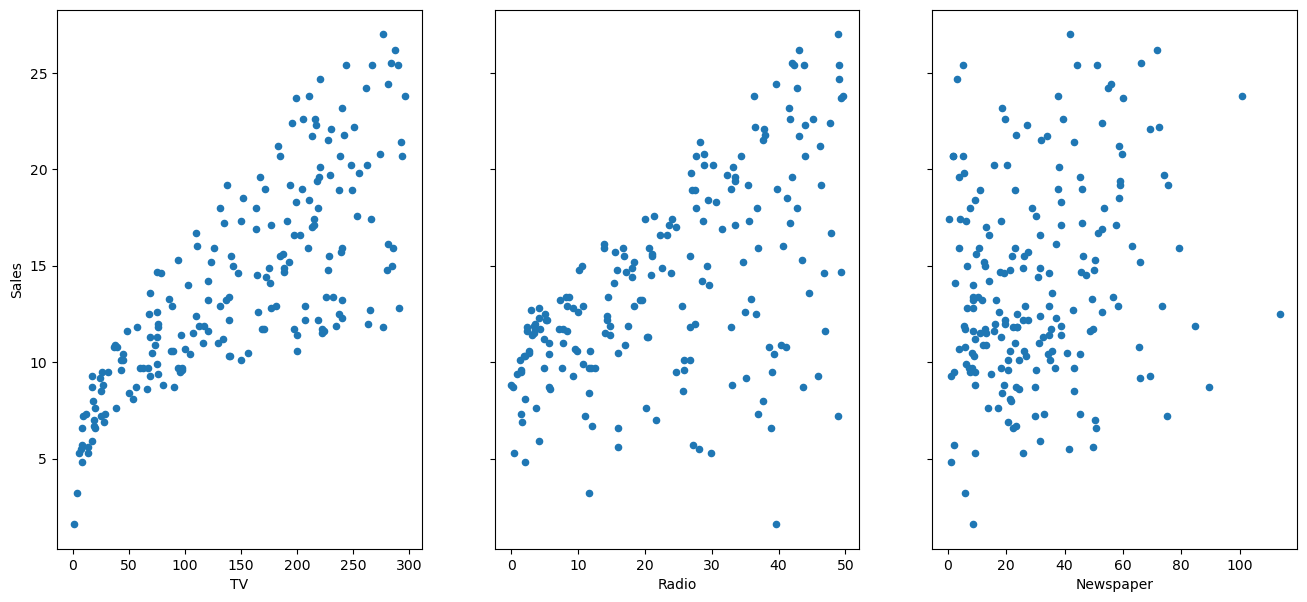

In [8]:
fig, axs = plt.subplots(1,3, sharey = True)
adv.plot(kind = "scatter", x = "TV", y = "Sales", ax = axs[0], figsize = (16,7))
adv.plot(kind = 'scatter', x = "Radio", y='Sales', ax = axs[1])
adv.plot(kind = 'scatter', x = "Newspaper", y = 'Sales', ax = axs[2])
plt.show()

### Let's analyse the TV column fisrt

In [9]:
feature_col = ["TV"]
x = adv[feature_col]
y = adv.Sales

In [10]:
# lets fit the data and evaluate the model

from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(x,y)

# print the coefficient and intercept
print(lm.intercept_)
print(lm.coef_)

7.032593549127693
[0.04753664]


In [11]:
#manually predicting the outcome with parameters
def pred_sales(x,m,c):
    predicted_value = (c + (m*x))
    return predicted_value

In [12]:
c = 7.032593549127693  # intercept
m = 0.04753664         # coefficient
x = 50                 # $ amount in k
a = pred_sales(x,m,c)
a

9.409425549127693

In [13]:
x_new = pd.DataFrame({"TV": [50]})
x_new["TV"] = 50
x_new.head()

,TV
0,50


In [14]:
b = lm.predict(x_new)
b

array([9.40942557])

In [15]:
# check if predicted and manually calculated are equal
a == b

array([False])

### Predicting the Least Square Line

Let's make predictions for the **smallest and largest observed values of x**, and then use the predicted values to plot the least squares line:

In [16]:
# create a new dataframe with minimum and maximum value of the variable TV
X_new = pd.DataFrame({"TV": [adv.TV.min(), adv.TV.max()]})
X_new.head()

,TV
0,0.7
1,296.4


In [17]:
preds = lm.predict(X_new)
preds

array([ 7.0658692 , 21.12245377])

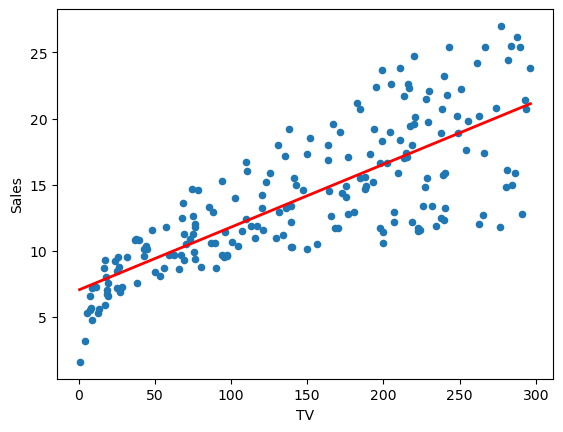

In [18]:
# Plot the observed data 
#plt.figure(figsize = (4,6))
adv.plot(kind = "scatter", x = "TV", y = "Sales")
# plot the least squares line
plt.plot(X_new, preds, c = "r", linewidth = 2)
plt.show()

### Confidence in the Model

In [19]:
import statsmodels.formula.api as smf
ln = smf.ols(formula = 'Sales ~ TV', data = adv).fit()
ln.conf_int()

,0,1
Intercept,6.129719,7.935468
TV,0.042231,0.052843


In [20]:
# p-value
ln.pvalues

Intercept    1.406300e-35
TV           1.467390e-42
dtype: float64

In [21]:
# R - Squared Value
ln.rsquared

0.611875050850071

## Multiple Linear Regression

Simple linear regression can easily be extended to include multiple features. This is called **multiple linear regression**:

$y = \beta_0 + \beta_1x_1 + ... + \beta_nx_n$

Each $x$ represents a different feature, and each feature has its own coefficient. In this case:

$y = \beta_0 + \beta_1 \times TV + \beta_2 \times Radio + \beta_3 \times Newspaper$

Let's use Statsmodels to estimate these coefficients:

In [22]:
# create dependent and independent variable
feature_cols = ['TV', 'Radio', 'Newspaper']
X = adv[feature_cols]
y = adv.Sales

In [23]:
adv.columns

Index(['TV', 'Radio', 'Newspaper', 'Sales'], dtype='object')

In [24]:
# train_test_split

from sklearn import model_selection
#from sklearn.model_selection import train_test_split

xtrain, xtest, ytrain, ytest = model_selection.train_test_split(X, y, train_size = 0.7, random_state = 42)

In [25]:
# without train test split data
# train the model
lm = LinearRegression()
lm.fit(X,y)

#print the coef and intercept
print(lm.coef_)
print(lm.intercept_)

[ 0.04576465  0.18853002 -0.00103749]
2.9388893694594067


In [26]:
# Using train and test data

#train the model
ln = LinearRegression()
ln.fit(xtrain, ytrain)

#print the coef and intercept
print(ln.coef_)
print(ln.intercept_)

#predict the output
ypred = ln.predict(xtest)

#RMSE of the model
print(np.sqrt(mean_squared_error(ytest, ypred)))

[0.04405928 0.1992875  0.00688245]
2.70894909251591
1.9485372043446387


How to interpret these coefficients? For a given amount of Radio and Newspaper ad spending, an **increase of $1000 in TV ad spending** was associated with an **increase in Sales of 45.765 widgets**.

A lot of the information to review piece-by-piece is available in the model summary output:

In [27]:
import statsmodels.formula.api as smf

In [28]:
lm = smf.ols(formula ='Sales ~ TV + Radio + Newspaper', data = adv).fit()
lm.conf_int()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     570.3
Date:                Sat, 02 Dec 2023   Prob (F-statistic):           1.58e-96
Time:                        11:06:31   Log-Likelihood:                -386.18
No. Observations:                 200   AIC:                             780.4
Df Residuals:                     196   BIC:                             793.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.9389      0.312      9.422      0.000       2.324       3.554
TV             0.0458      0.001     32.809      0.000       0.043       0.049
Radio          0.1885      0.009     21.893      0.000       0.172       0.206
Newspaper     -0.0010      0.006     -0.177      0.860      -0.013       0.011
==============================================================================
Omnibus:                       60.414   Durbin-Watson:                   2.084
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              151.241
Skew:                          -1.327   Prob(JB):                     1.44e-33
Kurtosis:                       6.332   Cond. No.                         454.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

What are a few key things you learn from this output?

- TV and Radio have significant **p-values**, whereas Newspaper does not. Thus, reject the null hypothesis for TV and Radio (that there is no association between those features and Sales), and fail to reject the null hypothesis for Newspaper.
- TV and Radio ad spending are both **positively associated** with Sales, whereas Newspaper ad spending was **slightly negatively associated** with Sales. (However, this is irrelevant since as you have failed to reject the null hypothesis for Newspaper.)
- This model has a higher **R-squared** (0.897) than the previous model, which means that this model provides a better fit to the data than a model that only includes TV.

## Feature Selection

How do you decide **what features have to be included** in a linear model? Here's one idea:
- Try different models, and only keep predictors in the model if they have small p-values.
- Check whether the R-squared value goes up when you add new predictors.

What are the **drawbacks** in this approach?
- Linear models rely upon a lot of **assumptions** (such as the features being independent), and if those assumptions are violated (which they usually are), R-squared and p-values are less reliable.
- Using a p-value cutoff of 0.05 means that if you add 100 predictors to a model that are **pure noise**, 5 of them (on average) will still be counted as significant.
- R-squared is susceptible to **overfitting**, and thus there is no guarantee that a model with a high R-squared value will generalize. Below is an example:

In [29]:
# only include TV and Radio to the model

lm = smf.ols(formula = 'Sales ~ TV + Radio', data = adv).fit()
lm.rsquared

0.8971942610828956

In [30]:
# add newspaper to the model which has -ve coef, no relationship with Sales

lm = smf.ols(formula = 'Sales~ TV + Radio + Newspaper', data = adv).fit()
lm.rsquared

0.8972106381789522

**R-squared will always increase as you add more features to the model**, even if they are unrelated to the response. Thus, selecting the model with the highest R-squared is not a reliable approach for choosing the best linear model.

There is alternative to R-squared called **adjusted R-squared** that penalizes model complexity (to control for overfitting), but it generally [under-penalizes complexity](http://scott.fortmann-roe.com/docs/MeasuringError.html).

So is there a better approach to feature selection? **Cross-validation.** It provides a more reliable estimate of out-of-sample error, and thus is a better way to choose which of your models will best **generalize** to out-of-sample data. There is extensive functionality for cross-validation in scikit-learn, including automated methods for searching different sets of parameters and different models. Importantly, cross-validation can be applied to any model, whereas the methods described above only apply to linear models.

## Handling Categorical Predictors with Two Categories

Up until now, all the predictors have been numeric. What if one of the predictors was categorical?

Let's create a new feature called **Size**, and randomly assign observations to be **small or large**:

In [31]:
import numpy as np
np.random.seed(12345)
nums = np.random.rand(len(adv))
mask_large = nums >0.5

adv['Size'] = 'small'
adv.loc[mask_large, 'Size'] = 'large'
adv.head()

,TV,Radio,Newspaper,Sales,Size
1,230.1,37.8,69.2,22.1,large
2,44.5,39.3,45.1,10.4,small
3,17.2,45.9,69.3,9.3,small
4,151.5,41.3,58.5,18.5,small
5,180.8,10.8,58.4,12.9,large


In [32]:
# create a variable islarge to represent Size in numerical

adv['Islarge'] = adv.Size.map({'small': 0 , 'large': 1})
adv.head()

,TV,Radio,Newspaper,Sales,Size,Islarge
1,230.1,37.8,69.2,22.1,large,1
2,44.5,39.3,45.1,10.4,small,0
3,17.2,45.9,69.3,9.3,small,0
4,151.5,41.3,58.5,18.5,small,0
5,180.8,10.8,58.4,12.9,large,1


In [33]:
# perform multiple linear regression by including islarge variable

feature_column = ['TV', 'Radio', 'Newspaper', 'Islarge']
X = adv[feature_column]
y = adv.Sales

In [34]:
lm = LinearRegression()
lm.fit(X,y)
print(feature_column,':', lm.coef_)
print(lm.intercept_)

['TV', 'Radio', 'Newspaper', 'Islarge'] : [ 0.04571982  0.18872814 -0.00109768  0.05742385]
2.9117013282568553


In [35]:
import statsmodels.formula.api as smf
lm = smf.ols(formula = 'Sales~ TV + Radio + Newspaper + Islarge', data = adv).fit()
lm.rsquared

0.8972400790092475

## Handling Categorical Predictors with More than Two Categories

Let's create a new feature called **Area**, and randomly assign observations to be **rural, suburban, or urban**:

In [36]:
import numpy as np

np.random.seed(12345)
num = np.random.rand(len(adv))

mask_suburban = (num > 0.33) & (num <= 0.66)
mask_urban = num > 0.66

adv['Area'] = 'rural'
adv.loc[mask_suburban, 'Area'] = 'suburban'
adv.loc[mask_urban, 'Area'] = 'urban'

adv.head()

,TV,Radio,Newspaper,Sales,Size,Islarge,Area
1,230.1,37.8,69.2,22.1,large,1,urban
2,44.5,39.3,45.1,10.4,small,0,rural
3,17.2,45.9,69.3,9.3,small,0,rural
4,151.5,41.3,58.5,18.5,small,0,rural
5,180.8,10.8,58.4,12.9,large,1,suburban


In [37]:
area_dummies = pd.get_dummies(adv.Area, prefix = "Area").iloc[:,1:]

adv = pd.concat([adv, area_dummies], axis = 1)
adv.head()

,TV,Radio,Newspaper,Sales,Size,Islarge,Area,Area_suburban,Area_urban
1,230.1,37.8,69.2,22.1,large,1,urban,False,True
2,44.5,39.3,45.1,10.4,small,0,rural,False,False
3,17.2,45.9,69.3,9.3,small,0,rural,False,False
4,151.5,41.3,58.5,18.5,small,0,rural,False,False
5,180.8,10.8,58.4,12.9,large,1,suburban,True,False


In [38]:
feature_colss = ["TV", "Radio", "Newspaper", "Islarge", "Area_suburban", "Area_urban"]
X = adv[feature_colss]
y = adv.Sales

ln = LinearRegression()
ln.fit(X,y)

print(feature_colss, ln.coef_)

['TV', 'Radio', 'Newspaper', 'Islarge', 'Area_suburban', 'Area_urban'] [ 0.0456175   0.18909888 -0.00164417  0.27237198 -0.52161688 -0.33298681]


How do you interpret the coefficients?
- Holding all other variables fixed, being a **suburban** area it is associated with an average **decrease** in Sales of 521.61 widgets (as compared to the baseline level, which is rural).
- Being an **urban** area it is associated with an average **decrease** in Sales of 332.98 widgets (as compared to rural).

**A final note about dummy encoding:** If you have categories that can be ranked (strongly disagree, disagree, neutral, agree, strongly agree), you can potentially use a single dummy variable and represent the categories numerically (1, 2, 3, 4, 5).